In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [33]:
#A Primer in Numerics: Ordinary Differential Equations

#choose step size 
dt = 0.01
#choose interval
T = 10

#set up parameters
w = 4*math.pi #natural frequency
z = 0.06     #damping coefficient
A = np.array([[0,1],
             [-w**2, -2*z*w]]) #spring-mass-damp system

x0 = np.array([2,0]) #initial conditions

#define grid
t_init, t_fin = (0,10)
t = np.arange(t_init, t_fin + dt, dt)


In [34]:
#forward Euler integrator
x = np.zeros((2,len(t)))
x[:,0] = x0
for i in range(0, len(t) - 1):
    x[:,i+1] = (np.eye(2) + dt*A) @ x[:,i] 


In [35]:
#backward Euler
xB = np.zeros((2,len(t)))
xB[:,0] = x0
for i in range(0, len(t) - 1):
    xB[:,i+1] = np.linalg.inv(np.eye(2) - dt*A) @ xB[:,i] 

In [36]:
#improved Euler 2nd order
xE = np.zeros((2,len(t)))
xE[:,0] = x0
k = np.zeros((2,1))
for i in range(len(t) - 1):
    k = (dt*A) @ x[:,i] 
    xE[:,i+1] = x[:,i] + 0.5*(k + dt*A@k )


In [37]:
#DIY Runge-Kutta 4th order
xRK = np.zeros((2,len(t)))
xRK[:,0] = x0
k1 = np.zeros((2,1))
k2 = np.zeros((2,1))
k3 = np.zeros((2,1))
k4 = np.zeros((2,1))
for i in range(len(t) - 1):
    k1 = dt*A@ xRK[:,i]
    k2 = dt*A@ (0.5*k1 + xRK[:,i])
    k3 = dt*A@ (0.5*k2 + xRK[:,i])
    k4 = dt*A@ (k3 + xRK[:,i])
    xRK[:,i+1] = xRK[:,i] + (k1 + 2*k2 + 2*k3 + k4)/6


In [38]:
#Standard Runge-Kutta
def ODE(t,x):
    return A @ x

solve = solve_ivp(ODE, (t_init,t_fin), x0, t_eval=t)
xODE=solve.y

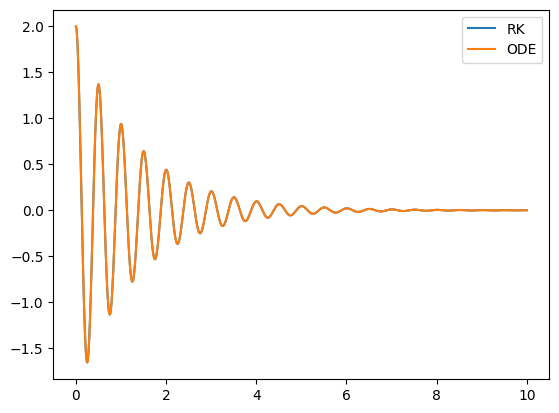

In [40]:
#plt.plot(t,x[0,:])
#plt.plot(t,xB[0,:])
#plt.plot(t,xE[0,:])
plt.plot(t,xRK[0,:])
plt.plot(t,xODE[0,:])
plt.legend(['RK','ODE'])
#plt.legend(['FE','BE','FE2','RK4'])
